## Pyschometric-based Audiences


In [1]:
import pandas as pd 
import numpy as np 

recruits = pd.read_csv('../data/audiences/db_events.csv')
recruits['score'] = recruits['score'].astype(int)
recruits['age'] = recruits['age'].astype(int)

recruits

,prolific_pid,study_id,entry,gender,age,score,trait,fbaccount,fbfrequency,fblogin,device,browser,attention_check,attention_check_passed
0,61bb372440db417c1a1389c8,67a0989a39f69ca7e82ba6a9,2025-02-21 09:43:28.801631,m,27,48,none,yes,daily,no,desktop,Chrome,5.0,True
1,65ce2ce3f2f16c6a9e8c68c8,67a0989a39f69ca7e82ba6a9,2025-02-21 09:43:48.970657,f,53,24,introvert,yes,weekly,yes,desktop,Chrome,5.0,True
2,5a8c85de2a842c0001fcf9f1,67a0989a39f69ca7e82ba6a9,2025-02-21 09:44:34.340435,f,37,82,extrovert,yes,daily,yes,desktop,Chrome,5.0,True
3,601c277aabe00c6bc759bf69,67a0989a39f69ca7e82ba6a9,2025-02-21 11:06:45.934253,m,29,73,extrovert,yes,weekly,yes,desktop,Chrome,5.0,True
4,55a1d8e2fdf99b1c103f2660,67a0989a39f69ca7e82ba6a9,2025-02-21 09:44:06.506338,m,54,23,introvert,yes,daily,yes,desktop,Chrome,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,66c209a30292f928d8d0b9ab,67a0989a39f69ca7e82ba6a9,2025-03-04 13:07:32.086387,f,37,74,extrovert,yes,daily,yes,desktop,Chrome,5.0,True
5329,66854dba287fdc346be76462,67a0989a39f69ca7e82ba6a9,2025-03-04 13:07:52.184106,f,48,5,introvert,yes,daily,no,desktop,Chrome,5.0,True
5330,5ea894742b0def30e41aa60d,67a0989a39f69ca7e82ba6a9,2025-03-04 13:08:03.920689,f,57,55,none,yes,daily,no,desktop,Chrome,5.0,True
5331,666359d51e208f9165a348a8,67a0989a39f69ca7e82ba6a9,2025-03-04 13:08:41.591339,m,47,66,none,yes,daily,no,desktop,Chrome,5.0,True


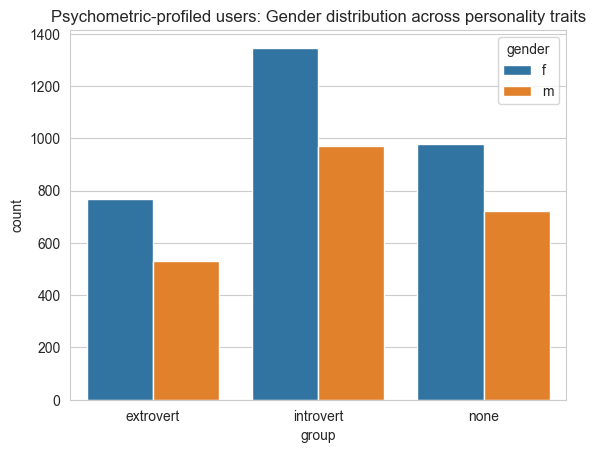

In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_style('whitegrid')

values = recruits.groupby(['trait' , 'gender'])['prolific_pid'].count().reset_index()
sns.barplot(values, x='trait', y='prolific_pid', hue='gender')
plt.title('Psychometric-profiled users: Gender distribution across personality traits')
plt.ylabel('count')
plt.xlabel('group');

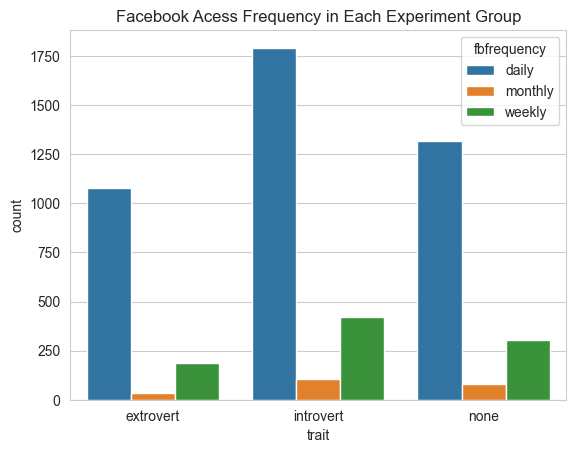

In [26]:
# Survey Responses for Facebook frequency use 
import seaborn as sns
import matplotlib.pyplot as plt

values = recruits.groupby(['trait' , 'fbfrequency'])['prolific_pid'].count().reset_index()
sns.barplot(values, x='trait', y='prolific_pid', hue='fbfrequency')
plt.title('Facebook Acess Frequency in Each Experiment Group')
plt.ylabel('count');

## Behavioral-based Audiences

In [28]:
import os 

os.chdir('../')

In [29]:
import utils 
import dotenv 
import os 
dotenv.load_dotenv()

extrovert_audience_id = os.getenv('EXTROVERT_AUDIENCE_ID')
introvert_audience_id = os.getenv('INTROVERT_AUDIENCE_ID')


# Custom Audience IDs 
custom_audiences = [
    { "name" : "extroverts_page_refined",  "id": extrovert_audience_id},
    { "name" : "introverts_page_refined",  "id": introvert_audience_id}
]
# Retrieve estimated size by Meta 
for audience in custom_audiences:
    size = utils.get_custom_audience_size(audience['id'])
    # concatenate size to the dictionary
    audience['size'] = size
    upper_bound = size['approximate_count_upper_bound']
    lower_bound = size['approximate_count_lower_bound']
    print(f" Size Lower Bound for {audience['name']} is {upper_bound}, and upper bound is: {lower_bound}")

 Size Lower Bound for extroverts_page_refined is 2500, and upper bound is: 2100
 Size Lower Bound for introverts_page_refined is 4100, and upper bound is: 3500


In [19]:
import pandas as pd 

# We conduct two campaigns with "Reach" objective
# This shows us the estimated (lowest) reach of our custom audiences (behaviorally profiled) in 24 hours day 

df = pd.read_csv('data/audiences/behavioral_audience_estimates.csv')

print('Behaviorally profiled introverts lowest estimated reach:', df['reach'][0])
print('Behaviorally profiled extroverts lowest estimated reach:', df['reach'][1])

Behaviorally profiled introverts lowest estimated reach: 2199
Behaviorally profiled extroverts lowest estimated reach: 1041
